<a href="https://colab.research.google.com/github/stefaniemeliss/IADS_SC_2022_ML_Intro/blob/main/2_linear_regression_example_diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Scikit-learn (sklearn) Datasets

## Plus doing linear and polynomial regression using Scikit-learn

- Michael Fairbank 2022
- The purpose of this notebook is to teach the basics of using Sklearn to do data fitting and inspect the results.

In [ ]:
import pandas as pd
import numpy as np
from sklearn import datasets

The Scikit-learn package comes with some standard datasets.  We will load the "diabetes" dataset as a dataframe.

In [ ]:
diabetes=datasets.load_diabetes(as_frame=True)
print(diabetes)

{'data':           age       sex       bmi        bp        s1        s2        s3  \
0    0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1   -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2    0.085299  0.050680  0.044451 -0.005671 -0.045599 -0.034194 -0.032356   
3   -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4    0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   
..        ...       ...       ...       ...       ...       ...       ...   
437  0.041708  0.050680  0.019662  0.059744 -0.005697 -0.002566 -0.028674   
438 -0.005515  0.050680 -0.015906 -0.067642  0.049341  0.079165 -0.028674   
439  0.041708  0.050680 -0.015906  0.017282 -0.037344 -0.013840 -0.024993   
440 -0.045472 -0.044642  0.039062  0.001215  0.016318  0.015283 -0.028674   
441 -0.045472 -0.044642 -0.073030 -0.081414  0.083740  0.027809  0.173816   

           s4        s5        s6  
0   -0.002592  0.019908 -0.017

As you see the loaded diabetes variable is a dictionary.  
- Alter the code above to just print out the "diabetes.DESCR" field to learn about what the diabetes dataset consists of.

In [ ]:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

The "diabetes.data" field contains the dataframe.   But this omits the data targets - the code below adds this "target" column into the dataframe, so we can work with it more easily.

In [ ]:
df=diabetes.data
df["disease_progression"]=diabetes.target
diabetes.data.head()
#diabetes.data.tail()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,disease_progression
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


## Question: 
- How many rows of data are there in the diabetes dataset?

In [ ]:
len(df)

442

## Linear Regression, using a test set

We'll do a regression task on two of the columns, i.e. bmi versus disease_progression, to investigate if there is a link.

- When training a regression model (or any machine-learning model), it's a good idea to only train on a subset of the data (the "training set") and keep part of the data separate to test on later (the "test set" or "validation set")

- We'll hold out the last 60 data points for the testing set:

In [ ]:
# Use only one feature
diabetes_X = np.reshape(df[["bmi"]].values,[-1,1])
#diabetes_X=np.concatenate([diabetes_X,diabetes_X**2],axis=1)
diabetes_y = df["disease_progression"].values

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-60]
diabetes_X_test = diabetes_X[-60:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes_y[:-60]
diabetes_y_test = diabetes_y[-60:]

Plot our training and test data points:

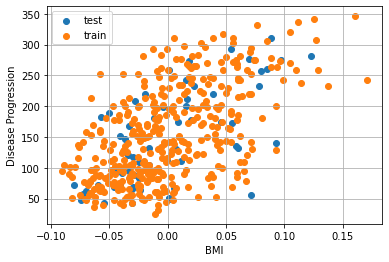

In [ ]:
import matplotlib.pyplot as plt
# Plot outputs
plt.scatter(diabetes_X_test[:,0], diabetes_y_test, label="test")
plt.scatter(diabetes_X_train[:,0], diabetes_y_train, label="train")
plt.xlabel("BMI")
plt.ylabel("Disease Progression")
plt.grid()
plt.legend()
plt.show()

Now we'll apply a very simple model (linear regression) to plot a straight line through the training points

See https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html for further details and options

Coefficients: 
 [940.05574082] 152.80161883617347


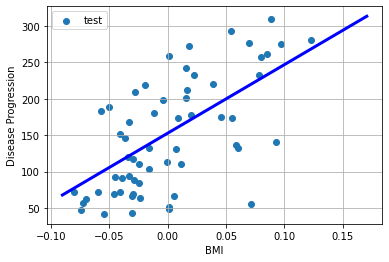

In [ ]:
from sklearn import linear_model

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
# this fits a regression equation on the training data, predicting disease progression using bmi
regr.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred_test = regr.predict(diabetes_X_test)

# The coefficients
print("Coefficients: \n", regr.coef_, regr.intercept_)

# Plot outputs
plt.scatter(diabetes_X_test[:,0], diabetes_y_test, label="test")
x_range=np.linspace(diabetes_X_train.min(),diabetes_X_train.max(),50).reshape(-1, 1)
plt.plot(x_range, regr.predict(x_range), color="blue", linewidth=3) # Plot the regression line
plt.xlabel("BMI")
plt.ylabel("Disease Progression")
plt.grid()
plt.legend()

plt.show()

# Coefficients: 
# [940.05574082] --> slope 
# 152.80161883617347 --> intercept

## Using metrics 

Scikit-learn includes metrics you can use to quantify how well your line-of-best fit fits the data.

Note that mean-squared-error  is defined by $MSE=\frac{1}{n}\sum_{i=1}^n (y\_pred(i)-y\_true(i))^2$.

The Coefficient of Determination ($R^2$) is defined by $1-\frac{MSE}{\frac{1}{n}\sum_{i=1}^n (y\_true(i)-\overline{y})^2$.}$, where $\overline{y}$ is the average of $y\_true$.

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(diabetes_y_test, diabetes_y_pred_test))
# The coefficient of determination: 1 is perfect prediction
print("R2 Score (Coefficient of determination) on test set: %.4f" % r2_score(diabetes_y_test, diabetes_y_pred_test))


Mean squared error: 3490.60
R2 Score (Coefficient of determination) on test set: 0.4104


## Questions 

- Modify the above code to print the metrics also on the training set, and compare the two.  
- Which result is better - the test set or the training set.
- What is the best possible value that Coefficient of Determination can ever be (in a perfect model)?

Mean squared error: 3954.01
R2 Score (Coefficient of determination) on train set: 0.3331


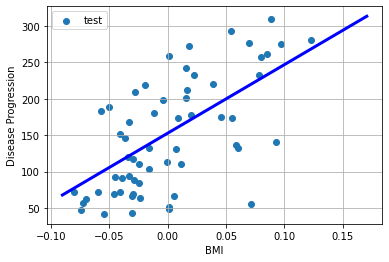

In [ ]:
# Make predictions using the training set
diabetes_y_pred_train = regr.predict(diabetes_X_train)

# Plot outputs
plt.scatter(diabetes_X_test[:,0], diabetes_y_test, label="test")
x_range=np.linspace(diabetes_X_train.min(),diabetes_X_train.max(),50).reshape(-1, 1)
plt.plot(x_range, regr.predict(x_range), color="blue", linewidth=3) # Plot the regression line
plt.xlabel("BMI")
plt.ylabel("Disease Progression")
plt.grid()
plt.legend()

from sklearn.metrics import mean_squared_error, r2_score
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(diabetes_y_train, diabetes_y_pred_train))
# The coefficient of determination: 1 is perfect prediction
print("R2 Score (Coefficient of determination) on train set: %.4f" % r2_score(diabetes_y_train, diabetes_y_pred_train))


According to the output above, the model fits the test data better than the training data.

R2 can have a maximum value of 1.

## Plotting predicted output versus true outputs

If the predictions match the true labels, then all the pints of predicted output versus actual output should line up nicely on the line y=x.  

- this is a nice trick for visualising something when there are more than 1 dimension in the input data (e.g. if we were doing multi-variate regression)


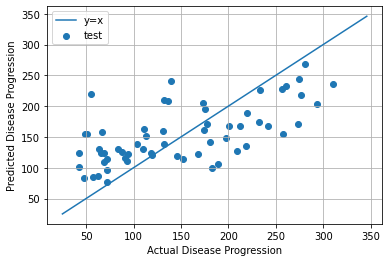

In [ ]:
y_range=np.linspace(diabetes_y_train.min(),diabetes_y_train.max(),50)
# Plot outputs
plt.scatter(diabetes_y_test, diabetes_y_pred_test, label="test")
plt.plot(y_range, y_range, label="y=x")
plt.xlabel("Actual Disease Progression")
plt.ylabel("Predicted Disease Progression")
plt.grid()
plt.legend()



## Polynomial regression

We have just attempted linear regression, i.e. finding "$y=mx+c$" through the datapoints.

- Now we can switch to polynomial regression.  This is finding an equation "$y=m_1 x+m_2 x^2+m_3 x^3+c$" through the datapoints.

- Note that polynomial regression is linear regression but where we use extra input features $x$, $x^2$, $x^3$, ...

Coefficients: 
 [ 1.01114956e+03 -4.67646834e+03  1.13829551e+03  9.25900767e+05
 -4.89755925e+06]
Mean squared error: 3499.08
R2 Score (Coefficient of determination) on test set: 0.4090


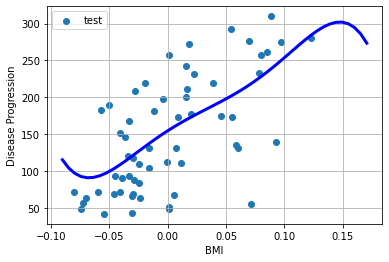

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=5, include_bias=False)
poly_features = poly.fit_transform(diabetes_X_train)

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(poly_features, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(poly.fit_transform(diabetes_X_test))


# The coefficients
print("Coefficients: \n", regr.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# The coefficient of determination: 1 is perfect prediction
print("R2 Score (Coefficient of determination) on test set: %.4f" % r2_score(diabetes_y_test, diabetes_y_pred))

# Plot outputs
plt.scatter(diabetes_X_test[:,0], diabetes_y_test, label="test")
x_range=np.linspace(diabetes_X_train.min(),diabetes_X_train.max(),50).reshape(-1, 1)
plt.plot(x_range, regr.predict(poly.fit_transform(x_range)), color="blue", linewidth=3) # Plot the regression line
plt.xlabel("BMI")
plt.ylabel("Disease Progression")
plt.grid()
plt.legend()

plt.show()

## Questions:

- Modify the code above to change the degree of the polynomial regression to 1, 2 and 5.
- Modify the code to print separate metrics on the training and test sets.
- If the degree of the polynomial is N, how many "coefficients" are printed in the code above?
- Modify the code above to also print the y-intercept for the regression curve.

Coefficients: 
 [940.05574082]
Mean squared error (test set): 3490.60
R2 Score (Coefficient of determination) (test set): 0.4104
Mean squared error (training set): 3954.01
R2 Score (Coefficient of determination) (training set): 0.3331


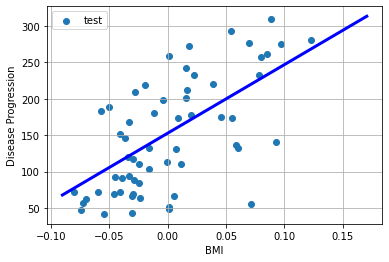

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=1, include_bias=False) # set polynomial regression to 1
poly_features = poly.fit_transform(diabetes_X_train)

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(poly_features, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred_test = regr.predict(poly.fit_transform(diabetes_X_test))
diabetes_y_pred_train = regr.predict(poly.fit_transform(diabetes_X_train))

# The coefficients
print("Coefficients: \n", regr.coef_)
# The mean squared error
print("Mean squared error (test set): %.2f" % mean_squared_error(diabetes_y_test, diabetes_y_pred_test))
# The coefficient of determination: 1 is perfect prediction
print("R2 Score (Coefficient of determination) (test set): %.4f" % r2_score(diabetes_y_test, diabetes_y_pred_test))
print("Mean squared error (training set): %.2f" % mean_squared_error(diabetes_y_train, diabetes_y_pred_train))
# The coefficient of determination: 1 is perfect prediction
print("R2 Score (Coefficient of determination) (training set): %.4f" % r2_score(diabetes_y_train, diabetes_y_pred_train))

# Plot outputs
plt.scatter(diabetes_X_test[:,0], diabetes_y_test, label="test")
x_range=np.linspace(diabetes_X_train.min(),diabetes_X_train.max(),50).reshape(-1, 1)
plt.plot(x_range, regr.predict(poly.fit_transform(x_range)), color="blue", linewidth=3) # Plot the regression line
plt.xlabel("BMI")
plt.ylabel("Disease Progression")
plt.grid()
plt.legend()

plt.show()

Coefficients: 
 [927.7907055 435.2104659]
Mean squared error (test set): 3497.51
R2 Score (Coefficient of determination) (test set): 0.4092
Mean squared error (training set): 3952.27
R2 Score (Coefficient of determination) (training set): 0.3334


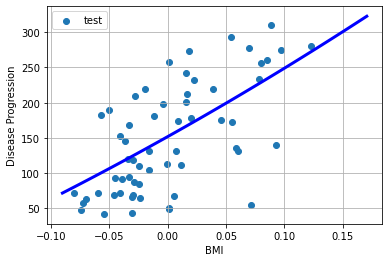

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2, include_bias=False) # set polynomial regression to 2
poly_features = poly.fit_transform(diabetes_X_train)

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(poly_features, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred_test = regr.predict(poly.fit_transform(diabetes_X_test))
diabetes_y_pred_train = regr.predict(poly.fit_transform(diabetes_X_train))

# The coefficients
print("Coefficients: \n", regr.coef_)
# The mean squared error
print("Mean squared error (test set): %.2f" % mean_squared_error(diabetes_y_test, diabetes_y_pred_test))
# The coefficient of determination: 1 is perfect prediction
print("R2 Score (Coefficient of determination) (test set): %.4f" % r2_score(diabetes_y_test, diabetes_y_pred_test))
print("Mean squared error (training set): %.2f" % mean_squared_error(diabetes_y_train, diabetes_y_pred_train))
# The coefficient of determination: 1 is perfect prediction
print("R2 Score (Coefficient of determination) (training set): %.4f" % r2_score(diabetes_y_train, diabetes_y_pred_train))

# Plot outputs
plt.scatter(diabetes_X_test[:,0], diabetes_y_test, label="test")
x_range=np.linspace(diabetes_X_train.min(),diabetes_X_train.max(),50).reshape(-1, 1)
plt.plot(x_range, regr.predict(poly.fit_transform(x_range)), color="blue", linewidth=3) # Plot the regression line
plt.xlabel("BMI")
plt.ylabel("Disease Progression")
plt.grid()
plt.legend()

plt.show()

Coefficients: 
 [ 1.01114956e+03 -4.67646834e+03  1.13829551e+03  9.25900767e+05
 -4.89755925e+06]
Mean squared error (test set): 3499.08
R2 Score (Coefficient of determination) (test set): 0.4090
Mean squared error (training set): 3915.65
R2 Score (Coefficient of determination) (training set): 0.3396


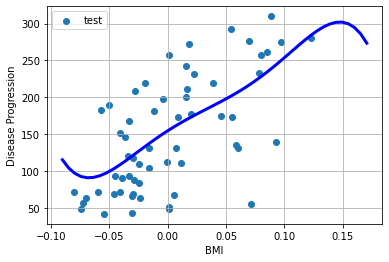

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=5, include_bias=False) # set polynomial regression to 5
poly_features = poly.fit_transform(diabetes_X_train)

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(poly_features, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred_test = regr.predict(poly.fit_transform(diabetes_X_test))
diabetes_y_pred_train = regr.predict(poly.fit_transform(diabetes_X_train))

# The coefficients
print("Coefficients: \n", regr.coef_)
# The mean squared error
print("Mean squared error (test set): %.2f" % mean_squared_error(diabetes_y_test, diabetes_y_pred_test))
# The coefficient of determination: 1 is perfect prediction
print("R2 Score (Coefficient of determination) (test set): %.4f" % r2_score(diabetes_y_test, diabetes_y_pred_test))
print("Mean squared error (training set): %.2f" % mean_squared_error(diabetes_y_train, diabetes_y_pred_train))
# The coefficient of determination: 1 is perfect prediction
print("R2 Score (Coefficient of determination) (training set): %.4f" % r2_score(diabetes_y_train, diabetes_y_pred_train))

# Plot outputs
plt.scatter(diabetes_X_test[:,0], diabetes_y_test, label="test")
x_range=np.linspace(diabetes_X_train.min(),diabetes_X_train.max(),50).reshape(-1, 1)
plt.plot(x_range, regr.predict(poly.fit_transform(x_range)), color="blue", linewidth=3) # Plot the regression line
plt.xlabel("BMI")
plt.ylabel("Disease Progression")
plt.grid()
plt.legend()

plt.show()

## Multiple input features (Multi-variate regression)

Previosly we just looked at how one variable (BMI) correlates with another variable (Disease_progression).  

Maybe we can do better at predicting disease progression if we use more than one input variable.    This leads us to try multivariate regression:

In [ ]:
# Use only one feature
diabetes_X3 = np.reshape(df[["bmi","bp","age"]].values,[-1,3])
#diabetes_X=np.concatenate([diabetes_X,diabetes_X**2],axis=1)
diabetes_y = df["disease_progression"].values

# Split the data into training/testing sets
diabetes_X3_train = diabetes_X3[:-60]
diabetes_X3_test = diabetes_X3[-60:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes_y[:-60]
diabetes_y_test = diabetes_y[-60:]

from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=1, include_bias=False)
poly_features = poly.fit_transform(diabetes_X3_train)

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(poly_features, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred_test = regr.predict(poly.fit_transform(diabetes_X3_test))
diabetes_y_pred_train = regr.predict(poly.fit_transform(diabetes_X3_train))
#x_range=np.linspace(diabetes_X_train.min(),diabetes_X_train.max(),50)

# The coefficients
print("Coefficients: \n", regr.coef_)
# The mean squared error
print("Mean squared error (test set): %.2f" % mean_squared_error(diabetes_y_test, diabetes_y_pred_test))
# The coefficient of determination: 1 is perfect prediction
print("R2 Score (Coefficient of determination) (test set): %.4f" % r2_score(diabetes_y_test, diabetes_y_pred_test))
print("Mean squared error (training set): %.2f" % mean_squared_error(diabetes_y_train, diabetes_y_pred_train))
# The coefficient of determination: 1 is perfect prediction
print("R2 Score (Coefficient of determination) (training set): %.4f" % r2_score(diabetes_y_train, diabetes_y_pred_train))

Coefficients: 
 [794.32156348 360.39573486  30.44983861]
Mean squared error (test set): 2852.49
R2 Score (Coefficient of determination) (test set): 0.5182
Mean squared error (training set): 3697.39
R2 Score (Coefficient of determination) (training set): 0.3764


As multivariate regression requires higher dimensions to view the input plane, instead we'll just plot the output prediction versus actual prediction

- and hope that they line up on $y=x$

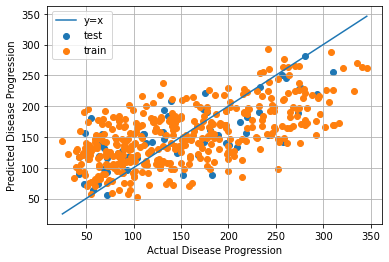

In [ ]:
y_range=np.linspace(diabetes_y_train.min(),diabetes_y_train.max(),50)
# Plot outputs
plt.scatter(diabetes_y_test, diabetes_y_pred_test, label="test")
plt.scatter(diabetes_y_train, diabetes_y_pred_train, label="train")
plt.plot(y_range, y_range, label="y=x")
plt.xlabel("Actual Disease Progression")
plt.ylabel("Predicted Disease Progression")
plt.grid()
plt.legend()

## Questions:

- In general, are the metrics better on the test set or the training set?

- For the polynomial regression method, try to plot a graph (below) of R2 Score on the y-axis versus the polynomial degree on the x-axis.  Show 2 curves, one for test set and one for training set.  Try to collect all of the data through polynomial degrees 1,2,3,4,5,6,7 in a single python for loop.

- What is the best regression method you can find to get the best performance on the test set?

Surprisingly, the values in the test data were often better than in the training data.

[1, 2, 3, 4, 5, 6, 7]
[0.3331463299382713, 0.33343941568732893, 0.33504175492655675, 0.3354075021815429, 0.3396163324520576, 0.3418073569320813, 0.342694923242819]
[0.4103896998623372, 0.40922240413937727, 0.40651997805025863, 0.4077044229778627, 0.40895635891843907, 0.4143111078138976, 0.4129299286852671]


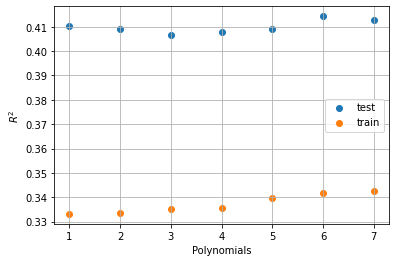

In [ ]:
# create empty lists for polynomials, r2_train, r2_test
polynomials = []
r2_train = []
r2_test = []

# start for loop to loop through different polynomials
for i in range(7):
    p = i+1 # account for the fact that python starts at 0

    # define polynomial regression
    poly = PolynomialFeatures(degree=p, include_bias=False) # set polynomial regression to p
    poly_features = poly.fit_transform(diabetes_X_train)

    # Create linear regression object
    regr = linear_model.LinearRegression()

    # Train the model using the training sets
    regr.fit(poly_features, diabetes_y_train)

    # Make predictions using the testing set
    diabetes_y_pred_test = regr.predict(poly.fit_transform(diabetes_X_test))
    diabetes_y_pred_train = regr.predict(poly.fit_transform(diabetes_X_train))

    # collect polynomials & R2 data for train and test data
    polynomials.append(p)
    r2_train.append(r2_score(diabetes_y_train, diabetes_y_pred_train))
    r2_test.append(r2_score(diabetes_y_test, diabetes_y_pred_test))  

# after the loop has executed, print data to plot
print(polynomials)
print(r2_train)
print(r2_test)

# Plot outputs
plt.scatter(polynomials, r2_test, label="test")
plt.scatter(polynomials, r2_train, label="train")
plt.xlabel("Polynomials")
plt.ylabel("$R^2$")
plt.grid()
plt.legend()